In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, List

In [3]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation: str
    result: int


In [8]:
def adder(state: AgentState) -> AgentState:
    """A node that adds two numbers"""
    state['result'] = state['number1'] + state['number2']
    return state  
def subtractor(state: AgentState) -> AgentState:
    """A node that subtracts two numbers"""
    state['result'] = state['number1'] - state['number2']
    return state

def decision_node(state: AgentState) -> str:
    """A decision node that chooses the operation"""
    if state['operation'] == '+':
        return 'add_node'
    elif state['operation'] == '-':
        return 'subtract_node'
    else:
        raise ValueError("Invalid operation")

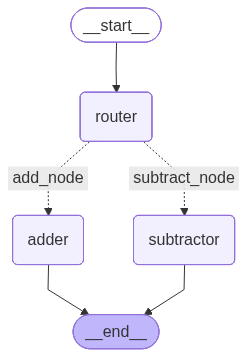

In [11]:
graph = StateGraph(AgentState)
graph.add_node("adder", adder)
graph.add_node("subtractor", subtractor)
graph.add_node("router", lambda state: state)

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decision_node,
    {
        "add_node": "adder",
        "subtract_node": "subtractor"
    }
)

graph.add_edge("adder", END)
graph.add_edge("subtractor", END)

app = graph.compile()
app


In [14]:
app.invoke(AgentState(number1=10, number2=5, operation='+'))

{'number1': 10, 'number2': 5, 'operation': '+', 'result': 15}